In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.utils import shuffle

In [2]:
T = 100
x = np.linspace(0,2*np.pi,T)
y = np.sin(x)

In [7]:
N = 30
idx = np.random.choice(T,size = N,replace = False)
X_train = x[idx].reshape(N,1)
y_train = y[idx]

In [9]:
## Create model
model = DecisionTreeRegressor()
model.fit(X_train,y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

In [10]:
## Predictions
preds = model.predict(x.reshape(T,1))
print("Accuracy of model ",model.score(x.reshape(T,1),y))

Accuracy of model  0.9760004531934802


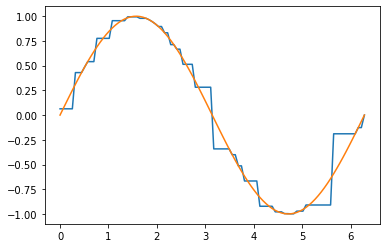

In [11]:
plt.plot(x,preds)
plt.plot(x,y)
plt.show()

In [18]:
## create Bagging Class
class BaggedTreeRegressor:
    def __init__(self,B):
        self.B = B
    
    def fit(self,X,Y):
        
        N = len(X)
        self.models = []
        for b in range(self.B):
            idx = np.random.choice(N,size = N , replace = False)
            Xb = X[idx]
            Yb = Y[idx]
            model = DecisionTreeRegressor()
            model.fit(Xb,Yb)
            self.models.append(model)
    
    def predict(self,X):
        preds = np.zeros(len(X))
        for model in self.models:
            preds += model.predict(X)
        return preds / self.B
    
    def score(self,X,Y):
        s1 = Y - self.predict(X)
        s2 = Y - Y.mean()
        return 1 - s1.dot(s1) / s2.dot(s2)

    

In [19]:
model = BaggedTreeRegressor(200)
model.fit(X_train,y_train)

print("Accuracy of model : ",model.score(x.reshape(T,1),y))

Accuracy of model :  0.9760004531934802


In [21]:
preds = model.predict(x.reshape(T,1))

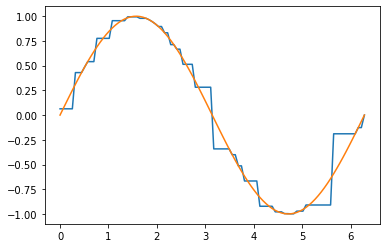

In [22]:
plt.plot(x,preds)
plt.plot(x,y)
plt.show()